In [1]:
### pip install pystan
### conda install -c conda-forge fbprophet
import pandas as pd
import fbprophet
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
# Load the dataset
dataset = pd.read_excel("data_electricity.xlsx")

In [4]:
dataset.head()

,datetime,megawatt
0,2023-01-25 00:00:00,17483
1,2023-01-25 00:15:00,22639
2,2023-01-25 00:30:00,22471
3,2023-01-25 00:45:00,25006
4,2023-01-25 01:00:00,19536


In [38]:
dataset = dataset.rename({'megawatt':'kilowatt'})

In [39]:
dataset.tail()

,ds,y
4988,2023-03-17 23:00:00,15338
4989,2023-03-17 23:15:00,18101
4990,2023-03-17 23:30:00,25620
4991,2023-03-17 23:45:00,18518
4992,2023-03-18 00:00:00,11202


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4993 entries, 0 to 4992
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  4993 non-null   datetime64[ns]
 1   megawatt  4993 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 78.1 KB


In [35]:
dataset.describe()

,y
count,4993.000000
mean,17741.782495
std,4672.601868
min,9590.000000
25%,13680.000000
50%,17741.000000
75%,21779.000000
max,25692.000000


In [7]:
dataset.columns = ['ds','y']

In [8]:
dataset.head()

,ds,y
0,2023-01-25 00:00:00,17483
1,2023-01-25 00:15:00,22639
2,2023-01-25 00:30:00,22471
3,2023-01-25 00:45:00,25006
4,2023-01-25 01:00:00,19536


In [9]:
from fbprophet import Prophet

In [ ]:
from fbprophet import Prophet
model = Prophet()
model.fit(dataset)
model.component_modes
future_dates = model.make_future_dataframe(periods=60)
future_dates
prediction = model.predict(future_dates)
model.predict_trend
model.plot(prediction)

In [10]:
model = Prophet()

In [11]:
model.fit(dataset)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [12]:
model.component_modes

{'additive': ['weekly',
  'daily',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [13]:
future_dates = model.make_future_dataframe(periods=60)

In [14]:
future_dates

,ds
0,2023-01-25 00:00:00
1,2023-01-25 00:15:00
2,2023-01-25 00:30:00
3,2023-01-25 00:45:00
4,2023-01-25 01:00:00
...,...
5048,2023-05-13 00:00:00
5049,2023-05-14 00:00:00
5050,2023-05-15 00:00:00
5051,2023-05-16 00:00:00


In [15]:
prediction = model.predict(future_dates)

In [16]:
model.predict_trend

<bound method Prophet.predict_trend of <fbprophet.forecaster.Prophet object at 0x000001B0636FDA60>>

In [17]:
model.plot_components

<bound method Prophet.plot_components of <fbprophet.forecaster.Prophet object at 0x000001B0636FDA60>>

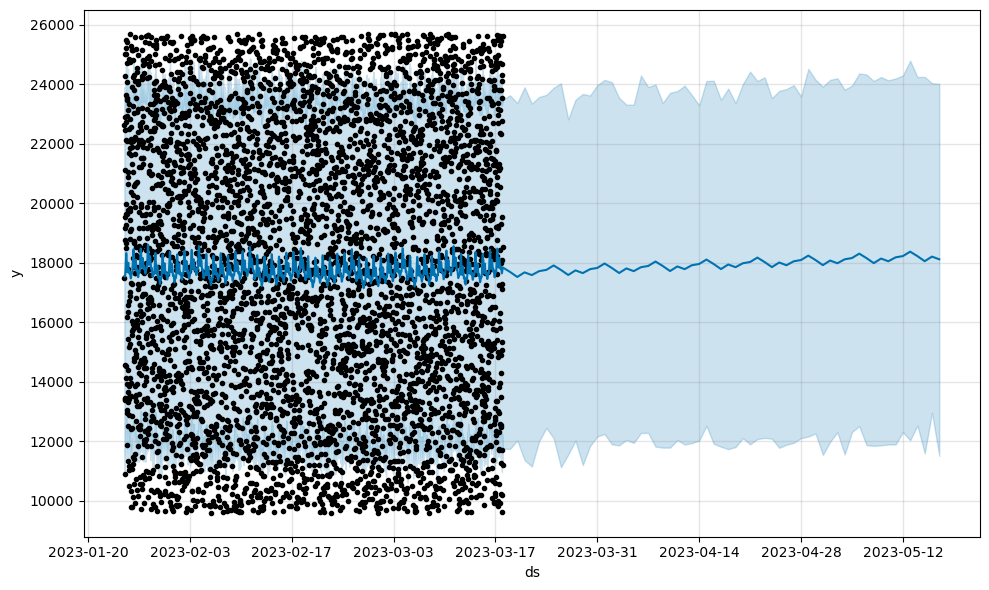

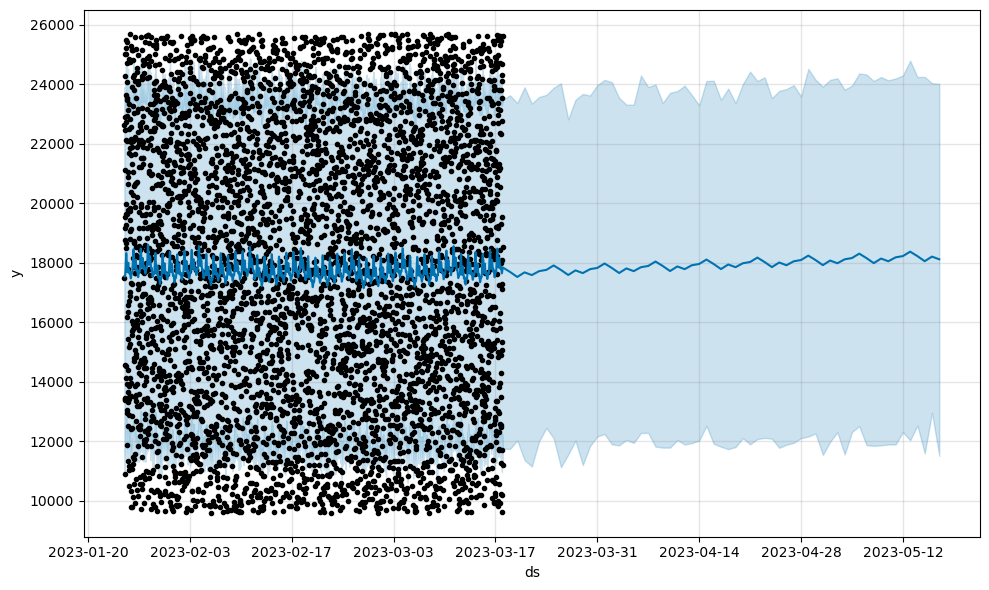

In [18]:
model.plot(prediction)

In [19]:
prediction = model.predict(future_dates)
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-01-25 00:00:00,17833.750105,11587.606187,23373.251207,17833.750105,17833.750105,-281.774948,-281.774948,-281.774948,-172.550921,-172.550921,-172.550921,-109.224026,-109.224026,-109.224026,0.0,0.0,0.0,17551.975157
1,2023-01-25 00:15:00,17833.684123,11272.482134,23739.736564,17833.684123,17833.684123,-277.216696,-277.216696,-277.216696,-167.825931,-167.825931,-167.825931,-109.390765,-109.390765,-109.390765,0.0,0.0,0.0,17556.467427
2,2023-01-25 00:30:00,17833.618141,11691.682656,23162.790779,17833.618141,17833.618141,-277.189463,-277.189463,-277.189463,-167.678345,-167.678345,-167.678345,-109.511118,-109.511118,-109.511118,0.0,0.0,0.0,17556.428678
3,2023-01-25 00:45:00,17833.552159,11637.726446,23326.588318,17833.552159,17833.552159,-280.764254,-280.764254,-280.764254,-171.179345,-171.179345,-171.179345,-109.584909,-109.584909,-109.584909,0.0,0.0,0.0,17552.787905
4,2023-01-25 01:00:00,17833.486177,12123.370563,24107.215846,17833.486177,17833.486177,-286.554633,-286.554633,-286.554633,-176.942634,-176.942634,-176.942634,-109.612000,-109.612000,-109.612000,0.0,0.0,0.0,17546.931543


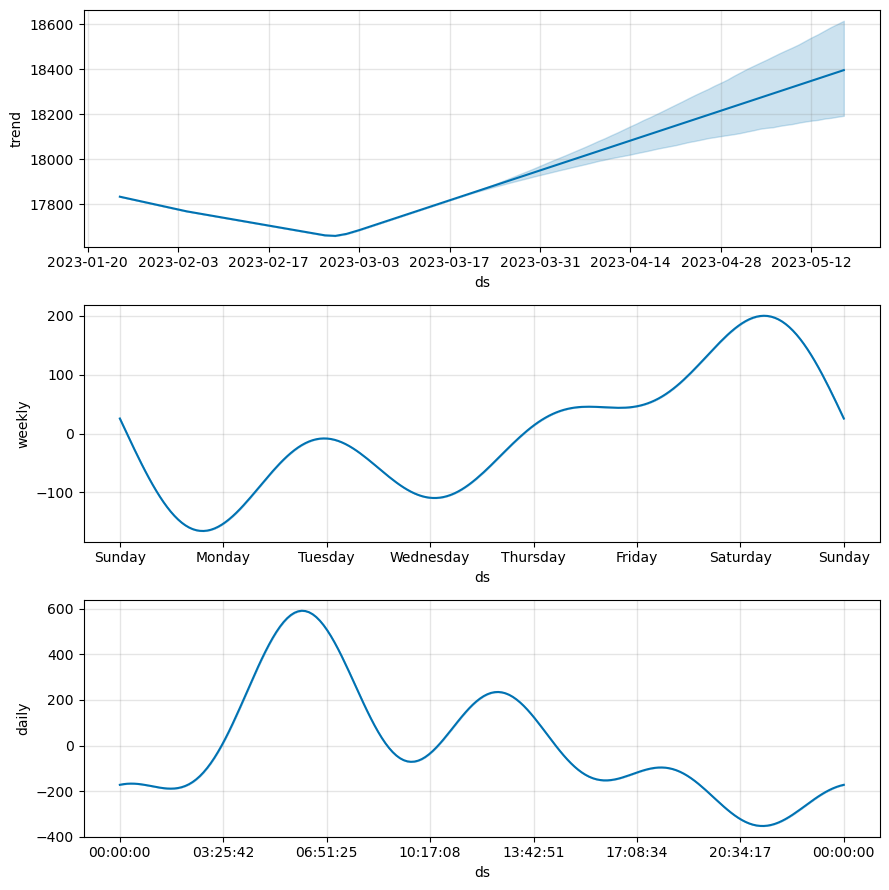

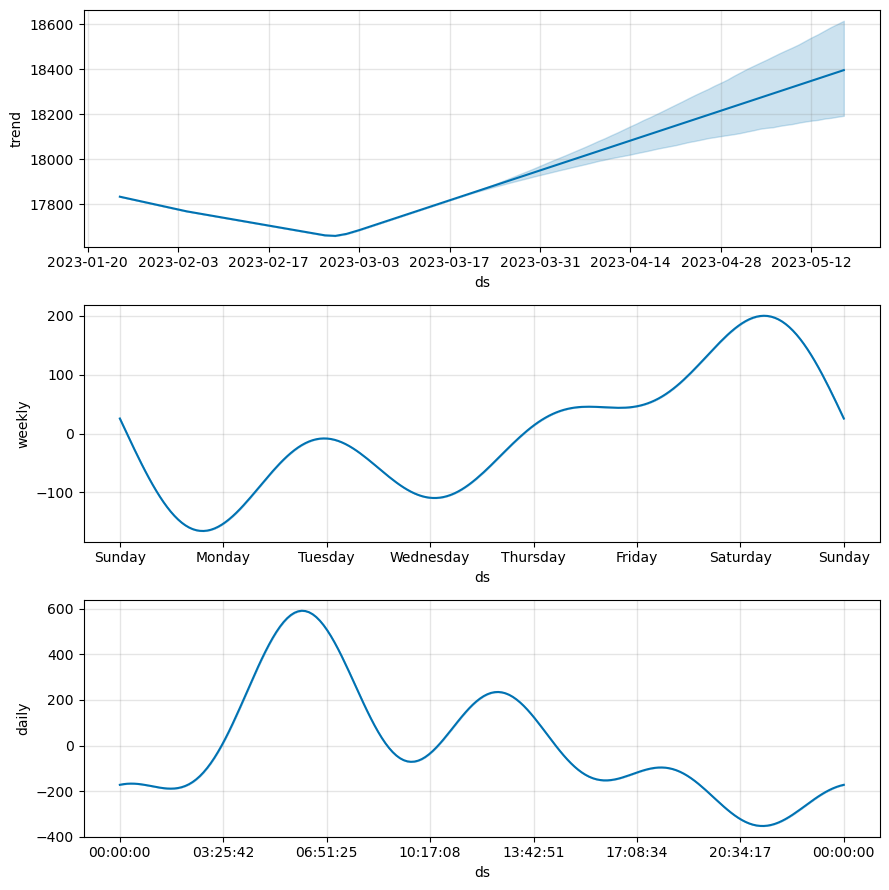

In [20]:
model.plot_components(prediction)

In [22]:
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-01-25 00:00:00,17833.750105,11587.606187,23373.251207,17833.750105,17833.750105,-281.774948,-281.774948,-281.774948,-172.550921,-172.550921,-172.550921,-109.224026,-109.224026,-109.224026,0.0,0.0,0.0,17551.975157
1,2023-01-25 00:15:00,17833.684123,11272.482134,23739.736564,17833.684123,17833.684123,-277.216696,-277.216696,-277.216696,-167.825931,-167.825931,-167.825931,-109.390765,-109.390765,-109.390765,0.0,0.0,0.0,17556.467427
2,2023-01-25 00:30:00,17833.618141,11691.682656,23162.790779,17833.618141,17833.618141,-277.189463,-277.189463,-277.189463,-167.678345,-167.678345,-167.678345,-109.511118,-109.511118,-109.511118,0.0,0.0,0.0,17556.428678
3,2023-01-25 00:45:00,17833.552159,11637.726446,23326.588318,17833.552159,17833.552159,-280.764254,-280.764254,-280.764254,-171.179345,-171.179345,-171.179345,-109.584909,-109.584909,-109.584909,0.0,0.0,0.0,17552.787905
4,2023-01-25 01:00:00,17833.486177,12123.370563,24107.215846,17833.486177,17833.486177,-286.554633,-286.554633,-286.554633,-176.942634,-176.942634,-176.942634,-109.612000,-109.612000,-109.612000,0.0,0.0,0.0,17546.931543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5048,2023-05-13 00:00:00,18357.463365,12496.715063,24491.075639,18174.541901,18554.464383,13.008688,13.008688,13.008688,-172.550921,-172.550921,-172.550921,185.559610,185.559610,185.559610,0.0,0.0,0.0,18370.472053
5049,2023-05-14 00:00:00,18366.934170,12363.543468,24586.204057,18180.267936,18570.368857,-147.015493,-147.015493,-147.015493,-172.550921,-172.550921,-172.550921,25.535428,25.535428,25.535428,0.0,0.0,0.0,18219.918677
5050,2023-05-15 00:00:00,18376.404975,12490.451197,23973.215614,18183.637112,18586.305874,-325.832173,-325.832173,-325.832173,-172.550921,-172.550921,-172.550921,-153.281251,-153.281251,-153.281251,0.0,0.0,0.0,18050.572802
5051,2023-05-16 00:00:00,18385.875780,11976.527806,23926.106665,18188.541640,18600.031652,-181.005023,-181.005023,-181.005023,-172.550921,-172.550921,-172.550921,-8.454101,-8.454101,-8.454101,0.0,0.0,0.0,18204.870758


In [23]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='30 days', period='15 days', horizon = '15 days')
df_cv.head()

INFO:fbprophet:Making 1 forecasts with cutoffs between 2023-03-03 00:00:00 and 2023-03-03 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2023-03-03 00:15:00,17373.583004,11616.913994,23204.644501,15313,2023-03-03
1,2023-03-03 00:30:00,17416.924158,10951.551529,23223.909064,21277,2023-03-03
2,2023-03-03 00:45:00,17455.758054,11532.416899,23503.263218,17576,2023-03-03
3,2023-03-03 01:00:00,17489.119725,11934.155533,23695.427286,24078,2023-03-03
4,2023-03-03 01:15:00,17516.681014,11354.215232,23372.766493,18519,2023-03-03


In [24]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,1 days 12:00:00,2.309396e+07,4805.617444,4241.659048,0.275122,0.235664,0.736111
1,1 days 12:15:00,2.323463e+07,4820.231504,4261.724707,0.276842,0.238312,0.736111
2,1 days 12:30:00,2.317446e+07,4813.986017,4252.259794,0.276431,0.238312,0.736111
3,1 days 12:45:00,2.323485e+07,4820.254330,4271.920519,0.277750,0.238312,0.736111
4,1 days 13:00:00,2.296649e+07,4792.336502,4241.329902,0.276603,0.235664,0.743056


In [25]:
df_p

,horizon,mse,rmse,mae,mape,mdape,coverage
0,1 days 12:00:00,2.309396e+07,4805.617444,4241.659048,0.275122,0.235664,0.736111
1,1 days 12:15:00,2.323463e+07,4820.231504,4261.724707,0.276842,0.238312,0.736111
2,1 days 12:30:00,2.317446e+07,4813.986017,4252.259794,0.276431,0.238312,0.736111
3,1 days 12:45:00,2.323485e+07,4820.254330,4271.920519,0.277750,0.238312,0.736111
4,1 days 13:00:00,2.296649e+07,4792.336502,4241.329902,0.276603,0.235664,0.743056
...,...,...,...,...,...,...,...
1292,14 days 23:00:00,2.564719e+07,5064.305866,4432.641962,0.273103,0.250787,0.659722
1293,14 days 23:15:00,2.561658e+07,5061.282400,4423.477045,0.272674,0.250787,0.659722
1294,14 days 23:30:00,2.572952e+07,5072.427213,4430.556526,0.269838,0.250787,0.659722
1295,14 days 23:45:00,2.572318e+07,5071.802721,4428.430943,0.269625,0.250787,0.659722


In [42]:
df_p.describe()

,horizon,mse,rmse,mae,mape,mdape,coverage
count,1297,1.297000e+03,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000
mean,8 days 06:00:00,2.238316e+07,4727.447684,4144.482012,0.256595,0.223199,0.730393
std,3 days 21:38:20.363393455,1.750909e+06,185.529064,176.619596,0.014972,0.015269,0.046637
min,1 days 12:00:00,1.764064e+07,4200.076277,3668.862441,0.218718,0.191801,0.625000
25%,4 days 21:00:00,2.137041e+07,4622.814035,4027.345893,0.247037,0.210525,0.708333
50%,8 days 06:00:00,2.226590e+07,4718.675790,4139.967215,0.257185,0.221482,0.729167
75%,11 days 15:00:00,2.336574e+07,4833.812485,4257.552741,0.267222,0.236185,0.756944
max,15 days 00:00:00,2.669092e+07,5166.325398,4562.955693,0.287861,0.258776,0.847222


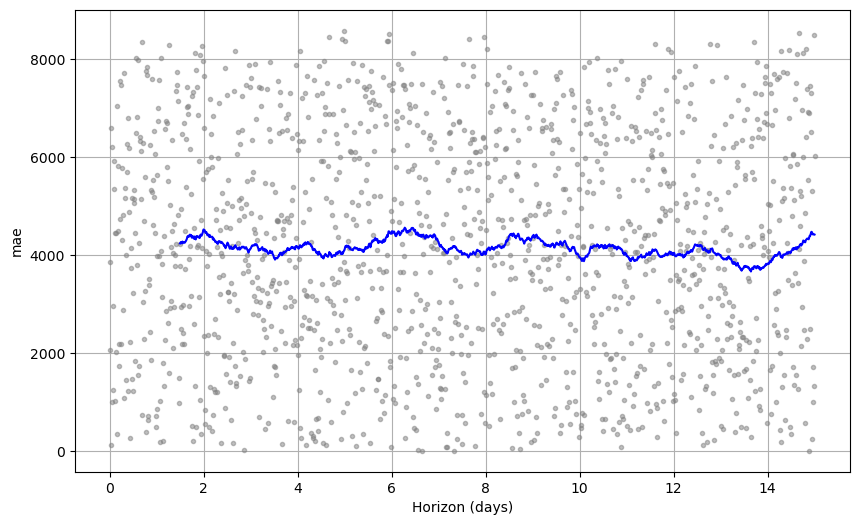

In [40]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mae')

In [27]:
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-01-25 00:00:00,17833.750105,11587.606187,23373.251207,17833.750105,17833.750105,-281.774948,-281.774948,-281.774948,-172.550921,-172.550921,-172.550921,-109.224026,-109.224026,-109.224026,0.0,0.0,0.0,17551.975157
1,2023-01-25 00:15:00,17833.684123,11272.482134,23739.736564,17833.684123,17833.684123,-277.216696,-277.216696,-277.216696,-167.825931,-167.825931,-167.825931,-109.390765,-109.390765,-109.390765,0.0,0.0,0.0,17556.467427
2,2023-01-25 00:30:00,17833.618141,11691.682656,23162.790779,17833.618141,17833.618141,-277.189463,-277.189463,-277.189463,-167.678345,-167.678345,-167.678345,-109.511118,-109.511118,-109.511118,0.0,0.0,0.0,17556.428678
3,2023-01-25 00:45:00,17833.552159,11637.726446,23326.588318,17833.552159,17833.552159,-280.764254,-280.764254,-280.764254,-171.179345,-171.179345,-171.179345,-109.584909,-109.584909,-109.584909,0.0,0.0,0.0,17552.787905
4,2023-01-25 01:00:00,17833.486177,12123.370563,24107.215846,17833.486177,17833.486177,-286.554633,-286.554633,-286.554633,-176.942634,-176.942634,-176.942634,-109.612000,-109.612000,-109.612000,0.0,0.0,0.0,17546.931543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5048,2023-05-13 00:00:00,18357.463365,12496.715063,24491.075639,18174.541901,18554.464383,13.008688,13.008688,13.008688,-172.550921,-172.550921,-172.550921,185.559610,185.559610,185.559610,0.0,0.0,0.0,18370.472053
5049,2023-05-14 00:00:00,18366.934170,12363.543468,24586.204057,18180.267936,18570.368857,-147.015493,-147.015493,-147.015493,-172.550921,-172.550921,-172.550921,25.535428,25.535428,25.535428,0.0,0.0,0.0,18219.918677
5050,2023-05-15 00:00:00,18376.404975,12490.451197,23973.215614,18183.637112,18586.305874,-325.832173,-325.832173,-325.832173,-172.550921,-172.550921,-172.550921,-153.281251,-153.281251,-153.281251,0.0,0.0,0.0,18050.572802
5051,2023-05-16 00:00:00,18385.875780,11976.527806,23926.106665,18188.541640,18600.031652,-181.005023,-181.005023,-181.005023,-172.550921,-172.550921,-172.550921,-8.454101,-8.454101,-8.454101,0.0,0.0,0.0,18204.870758


In [30]:
pred = prediction.loc[:, ['ds', 'yhat']]  # select by column names


KeyError: 'trend'

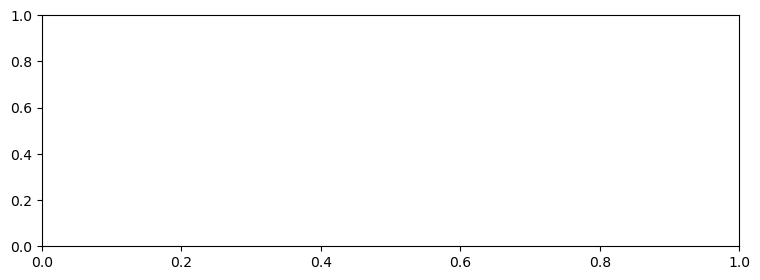

In [31]:
model.plot_components(pred)

In [32]:
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-01-25 00:00:00,17833.750105,11587.606187,23373.251207,17833.750105,17833.750105,-281.774948,-281.774948,-281.774948,-172.550921,-172.550921,-172.550921,-109.224026,-109.224026,-109.224026,0.0,0.0,0.0,17551.975157
1,2023-01-25 00:15:00,17833.684123,11272.482134,23739.736564,17833.684123,17833.684123,-277.216696,-277.216696,-277.216696,-167.825931,-167.825931,-167.825931,-109.390765,-109.390765,-109.390765,0.0,0.0,0.0,17556.467427
2,2023-01-25 00:30:00,17833.618141,11691.682656,23162.790779,17833.618141,17833.618141,-277.189463,-277.189463,-277.189463,-167.678345,-167.678345,-167.678345,-109.511118,-109.511118,-109.511118,0.0,0.0,0.0,17556.428678
3,2023-01-25 00:45:00,17833.552159,11637.726446,23326.588318,17833.552159,17833.552159,-280.764254,-280.764254,-280.764254,-171.179345,-171.179345,-171.179345,-109.584909,-109.584909,-109.584909,0.0,0.0,0.0,17552.787905
4,2023-01-25 01:00:00,17833.486177,12123.370563,24107.215846,17833.486177,17833.486177,-286.554633,-286.554633,-286.554633,-176.942634,-176.942634,-176.942634,-109.612000,-109.612000,-109.612000,0.0,0.0,0.0,17546.931543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5048,2023-05-13 00:00:00,18357.463365,12496.715063,24491.075639,18174.541901,18554.464383,13.008688,13.008688,13.008688,-172.550921,-172.550921,-172.550921,185.559610,185.559610,185.559610,0.0,0.0,0.0,18370.472053
5049,2023-05-14 00:00:00,18366.934170,12363.543468,24586.204057,18180.267936,18570.368857,-147.015493,-147.015493,-147.015493,-172.550921,-172.550921,-172.550921,25.535428,25.535428,25.535428,0.0,0.0,0.0,18219.918677
5050,2023-05-15 00:00:00,18376.404975,12490.451197,23973.215614,18183.637112,18586.305874,-325.832173,-325.832173,-325.832173,-172.550921,-172.550921,-172.550921,-153.281251,-153.281251,-153.281251,0.0,0.0,0.0,18050.572802
5051,2023-05-16 00:00:00,18385.875780,11976.527806,23926.106665,18188.541640,18600.031652,-181.005023,-181.005023,-181.005023,-172.550921,-172.550921,-172.550921,-8.454101,-8.454101,-8.454101,0.0,0.0,0.0,18204.870758


In [33]:
prediction.to_csv('F:\\CDIX_Intern\\day 2 - 19012023\\pred.csv')